## Dataset Description  

| Column Name       | Description |
|-------------------|-------------|
| **N**             | Nitrogen content in soil |
| **P**             | Phosphorus content in soil |
| **K**             | Potassium content in soil |
| **temperature**   | Air temperature (°C) |
| **humidity**      | Relative humidity (%) |
| **ph**            | Soil acidity/alkalinity (pH value) |
| **rainfall**      | Rainfall (mm) |
| **label**         | Crop type (target variable) |


# **Libraries Required**


In [1]:
pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [2]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **Preprocessing**

## Load DataSet

In [3]:
df = pd.read_csv('Synthetic_Crop_Dataset.csv')

## Understanding the Dataset

In [4]:
df.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,91.156218,36.781374,52.803414,29.056018,72.173384,5.500000,500.000000,rice
1,138.114670,38.934683,36.051094,22.821762,73.493325,6.615954,881.925124,rice
2,126.448462,52.845082,32.353087,32.491007,68.918341,5.815212,660.201225,rice
3,87.045823,68.582344,37.143011,22.870411,71.068557,7.500000,1105.944902,rice
4,123.548258,58.460552,25.345473,26.317446,75.055443,5.997043,1154.012135,rice


In [5]:
df.shape

(66000, 8)

In [6]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,66000.000000,66000.000000,66000.000000,66000.000000,66000.000000,66000.000000,66000.000000
mean,109.852709,50.053998,125.604156,24.172799,74.778824,6.582886,929.351815
std,107.159005,32.795358,151.526373,5.816782,18.021775,0.780654,566.576175
min,0.000000,10.000000,10.000000,10.000000,0.000000,5.000000,200.000000
25%,29.214379,27.956464,30.130068,20.000000,65.000000,6.022153,519.657929
50%,76.799640,41.085655,61.633569,24.309878,79.494147,6.564948,721.916555
75%,162.736462,59.130657,177.992743,28.400716,88.813879,7.133886,1162.319349
max,600.000000,200.000000,900.000000,38.000000,112.500000,8.500000,3000.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66000 entries, 0 to 65999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            66000 non-null  float64
 1   P            66000 non-null  float64
 2   K            66000 non-null  float64
 3   temperature  66000 non-null  float64
 4   humidity     66000 non-null  float64
 5   ph           66000 non-null  float64
 6   rainfall     66000 non-null  float64
 7   label        66000 non-null  object 
dtypes: float64(7), object(1)
memory usage: 4.0+ MB


In [8]:
crop_data = df[df["label"] == 'apple']
crop_data.min()

N               30.0
P              110.0
K              190.0
temperature     10.0
humidity        85.0
ph               5.5
rainfall       500.0
label          apple
dtype: object

In [9]:
crop_data.max()

N               100.0
P               150.0
K               210.0
temperature      25.0
humidity         95.0
ph                7.5
rainfall       1200.0
label           apple
dtype: object

# **Exploratory Data Analysis (EDA)**

## Missing Values

In [10]:
print(df.isnull().sum().sum())
print('---------------')
print(df.isnull().sum())

0
---------------
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


## Duplicates

In [11]:
df.duplicated().sum()

np.int64(0)

## Analysis

In [12]:
# checking the unique values of label
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [13]:
# checking the values of each labels 
df['label'].value_counts()

label
rice           3000
maize          3000
chickpea       3000
kidneybeans    3000
pigeonpeas     3000
mothbeans      3000
mungbean       3000
blackgram      3000
lentil         3000
pomegranate    3000
banana         3000
mango          3000
grapes         3000
watermelon     3000
muskmelon      3000
apple          3000
orange         3000
papaya         3000
coconut        3000
cotton         3000
jute           3000
coffee         3000
Name: count, dtype: int64

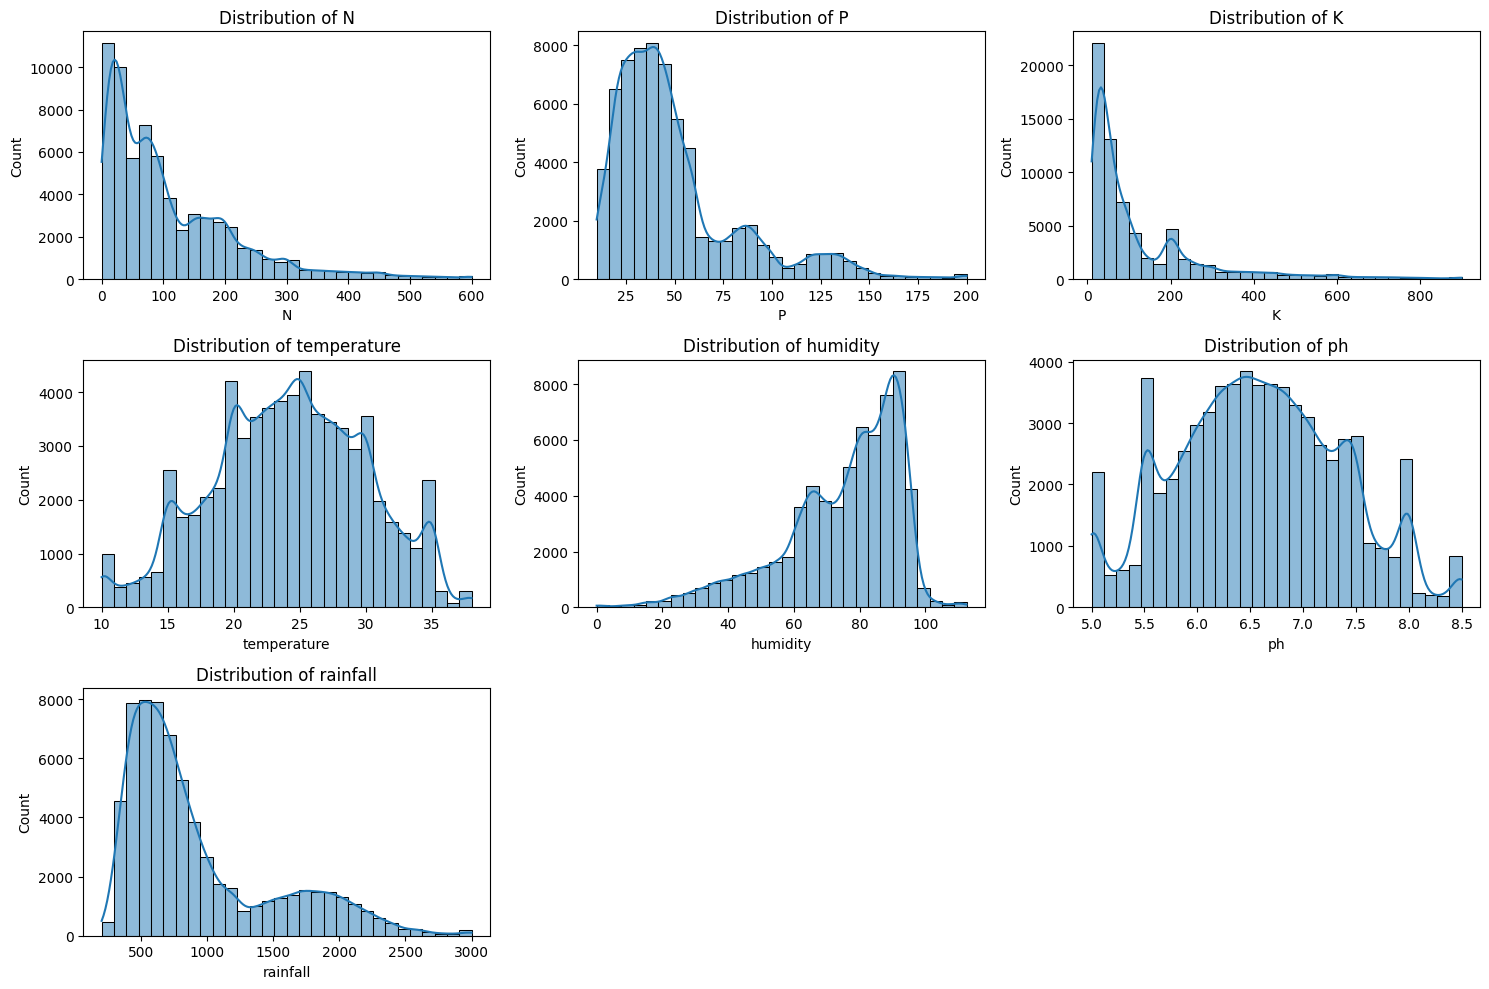

In [14]:
# Distribution of numerical features
num_features = ['N','P','K','temperature','humidity','ph','rainfall']

plt.figure(figsize=(15,10))
for i, col in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

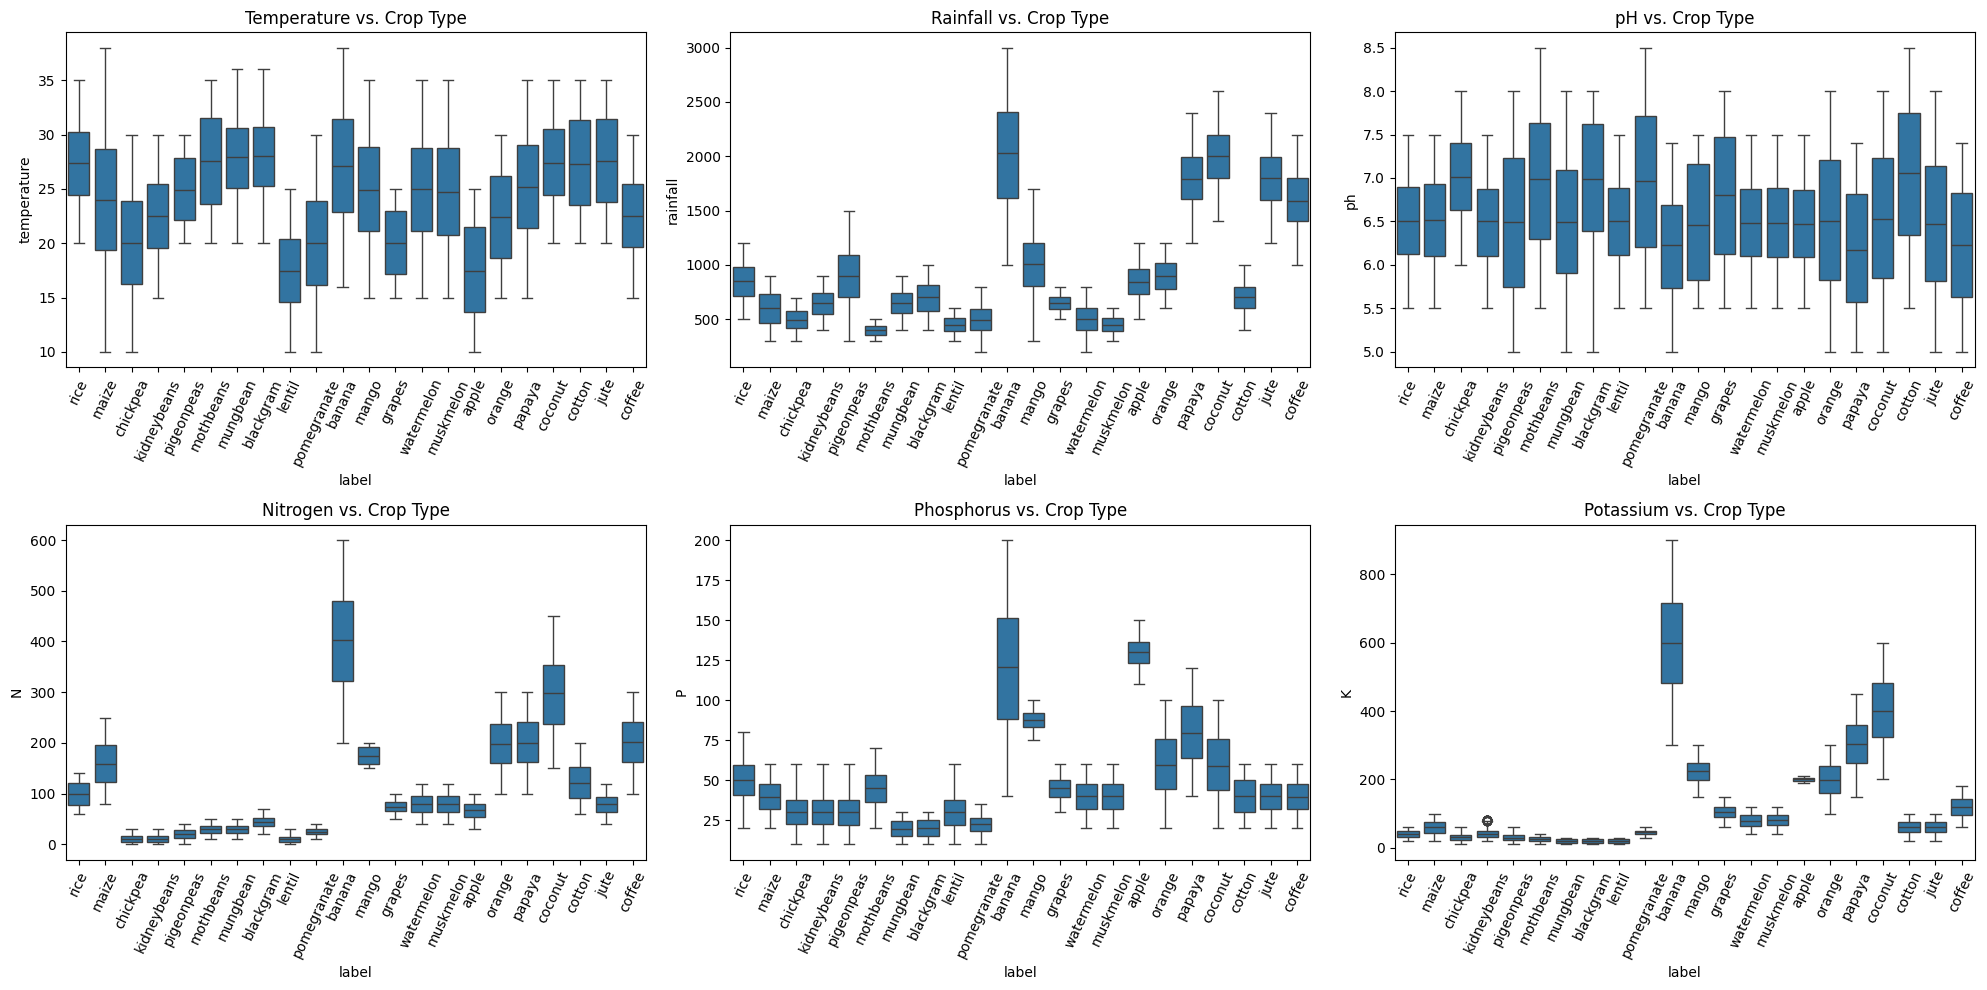

In [15]:
# 2. Relationship between key numerical features and the target variable
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
sns.boxplot(x='label', y='temperature', data=df)
plt.title('Temperature vs. Crop Type')
plt.xticks(rotation=65)

plt.subplot(2, 3, 2)
sns.boxplot(x='label', y='rainfall', data=df)
plt.title('Rainfall vs. Crop Type')
plt.xticks(rotation=65)

plt.subplot(2, 3, 3)
sns.boxplot(x='label', y='ph', data=df)
plt.title('pH vs. Crop Type')
plt.xticks(rotation=65)

plt.subplot(2, 3, 4)
sns.boxplot(x='label', y='N', data=df)
plt.title('Nitrogen vs. Crop Type')
plt.xticks(rotation=65)

plt.subplot(2, 3, 5)
sns.boxplot(x='label', y='P', data=df)
plt.title('Phosphorus vs. Crop Type')
plt.xticks(rotation=65)

plt.subplot(2, 3, 6)
sns.boxplot(x='label', y='K', data=df)
plt.title('Potassium vs. Crop Type')
plt.xticks(rotation=65)

plt.tight_layout()
plt.show()


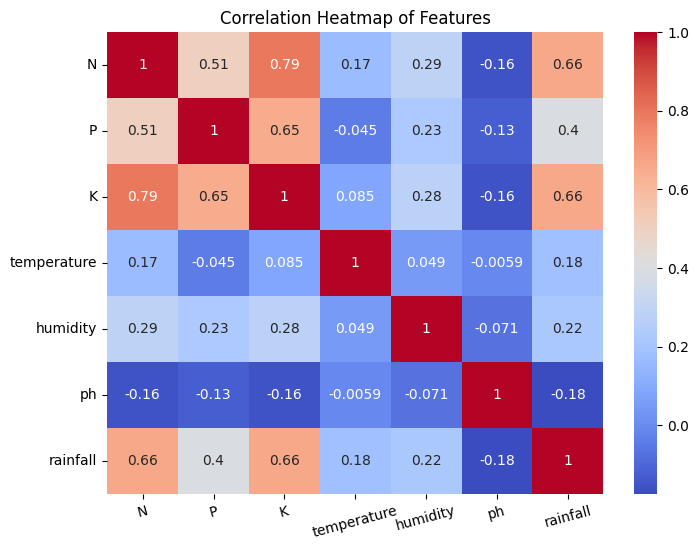

In [16]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[num_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.xticks(rotation=15)
plt.show()

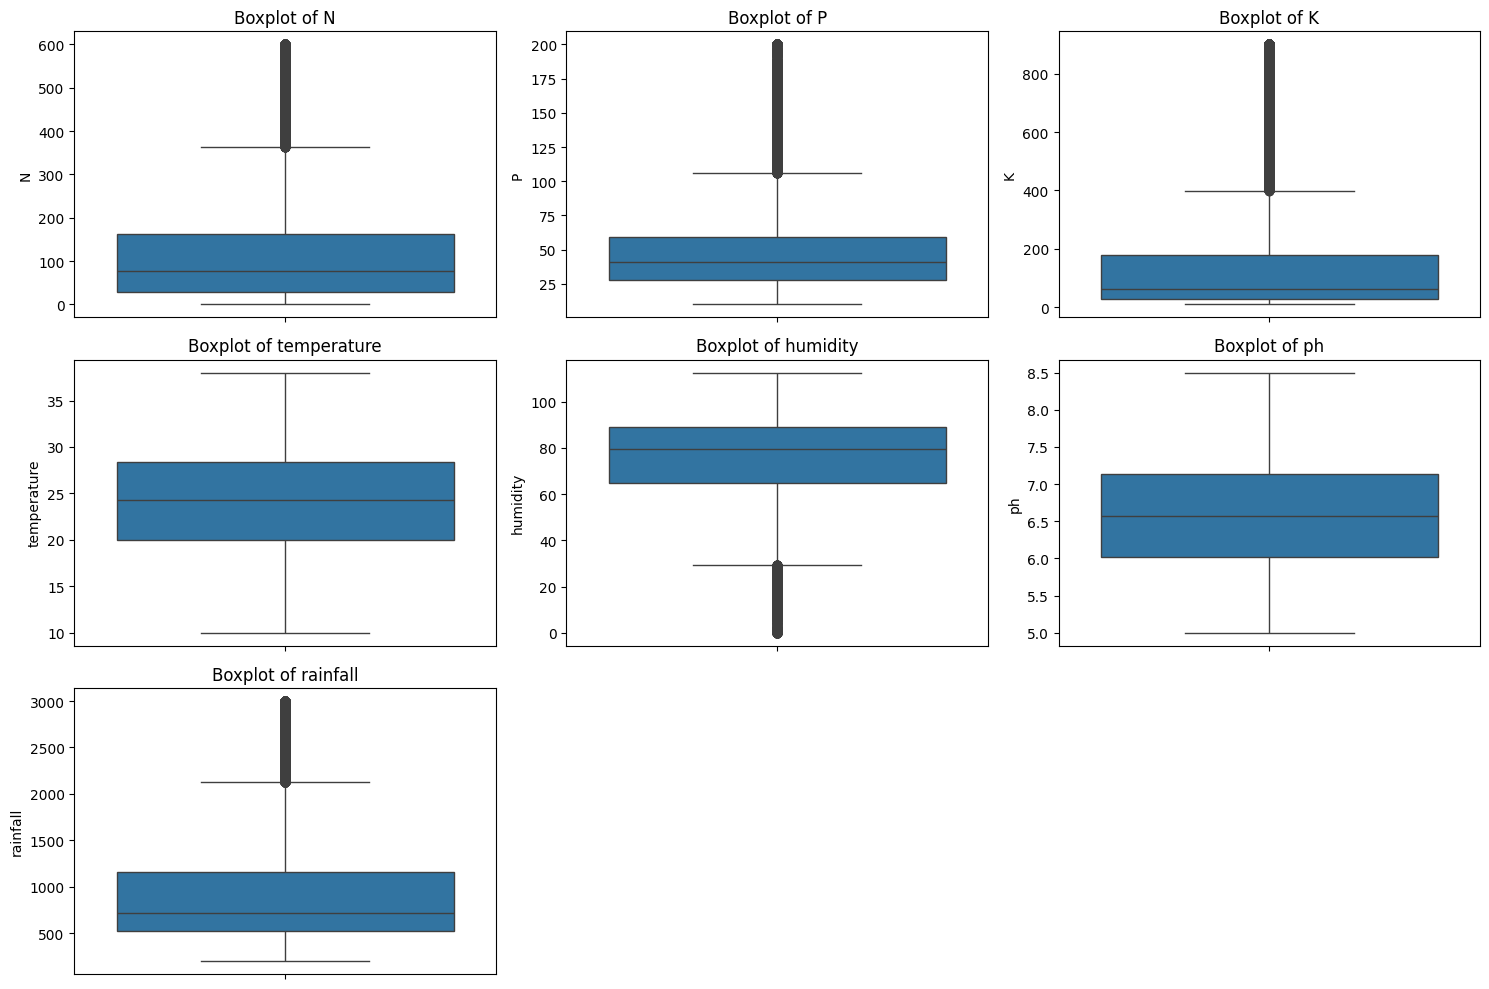

In [17]:
plt.figure(figsize=(15,10))
for i, col in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

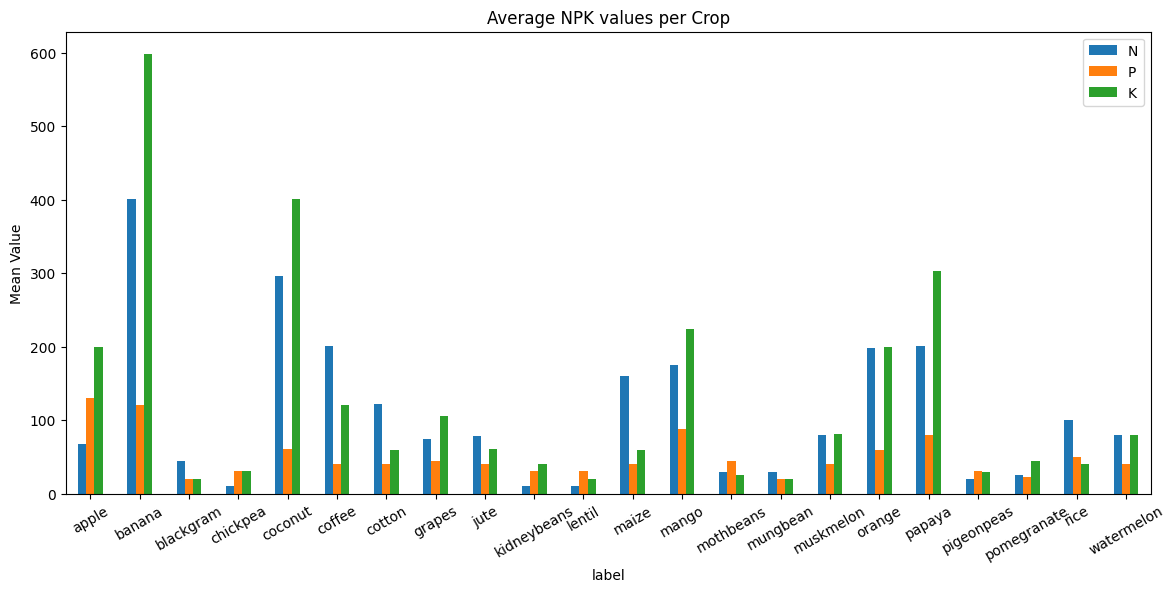

In [18]:
#  Average feature values by crop
plt.figure(figsize=(12,6))
avg_values = df.groupby("label")[['N','P','K']].mean()
avg_values.plot(kind="bar", figsize=(14,6))
plt.title("Average NPK values per Crop")
plt.ylabel("Mean Value")
plt.xticks(rotation=30)
plt.show()

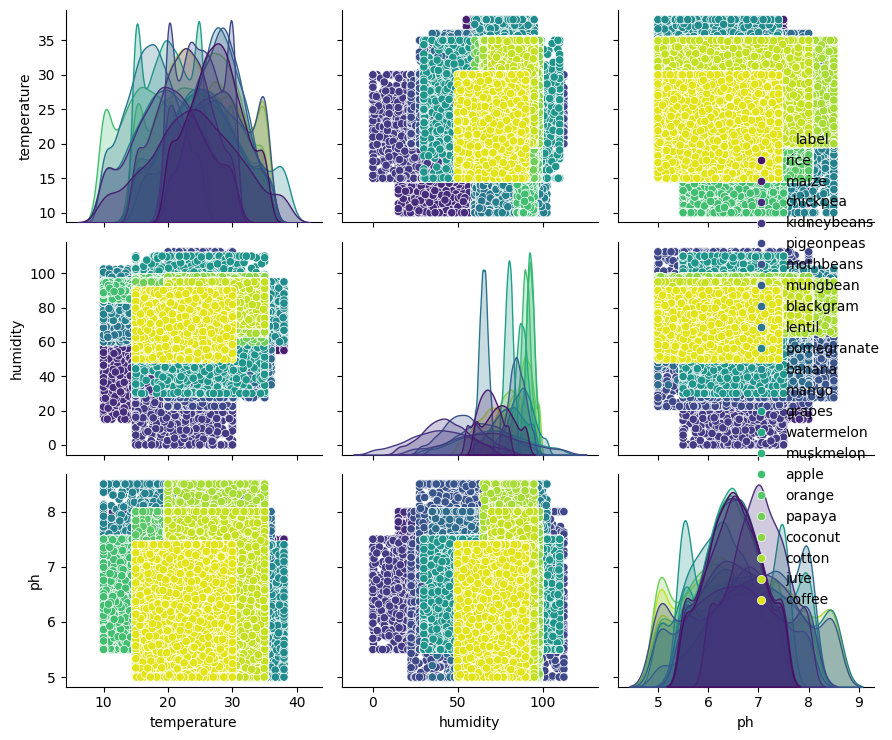

In [19]:
# 4. Pair plot for a subset of features to see inter-feature relationships
sns.pairplot(df[['temperature', 'humidity', 'ph', 'label']], hue='label', palette='viridis')
plt.tight_layout()
plt.show()

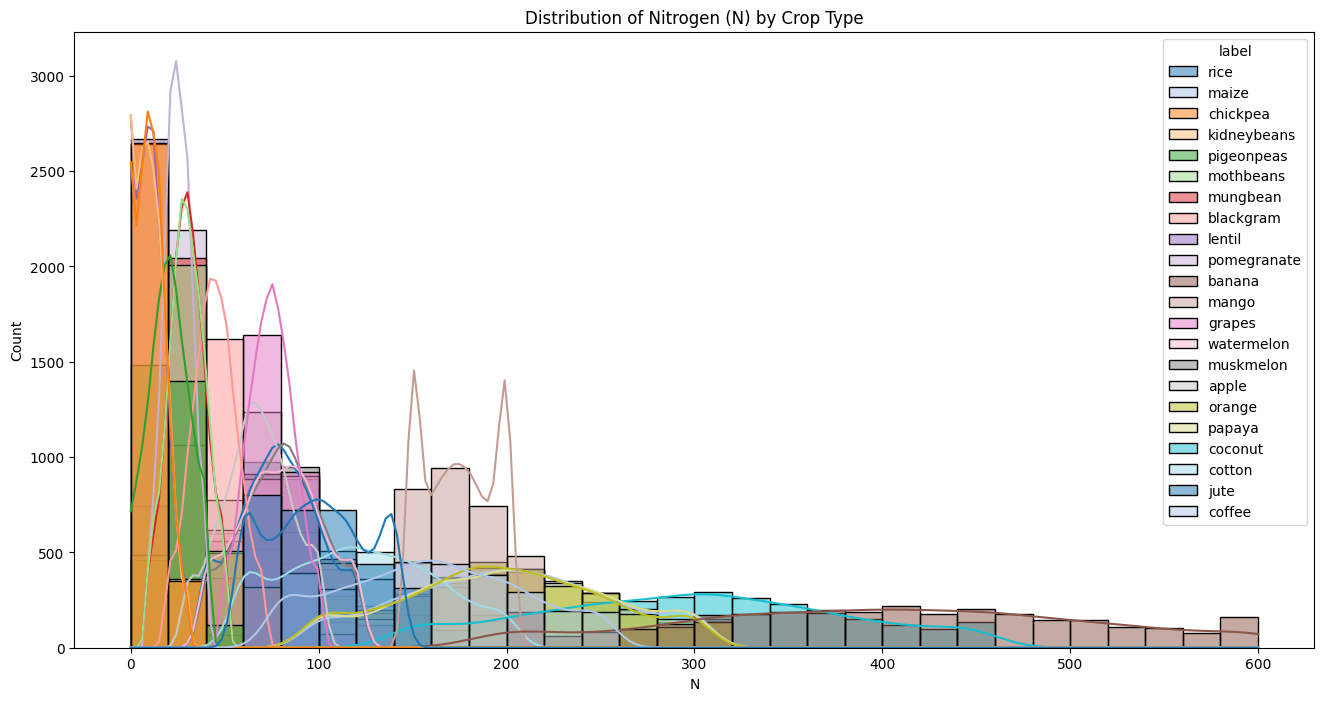

In [20]:
# This is more insightful than a single histogram as it shows the feature's role in classification.
plt.figure(figsize=(16, 8))
sns.histplot(data=df, x='N', hue='label', bins=30, kde=True, palette='tab20')
plt.title('Distribution of Nitrogen (N) by Crop Type')
plt.show()

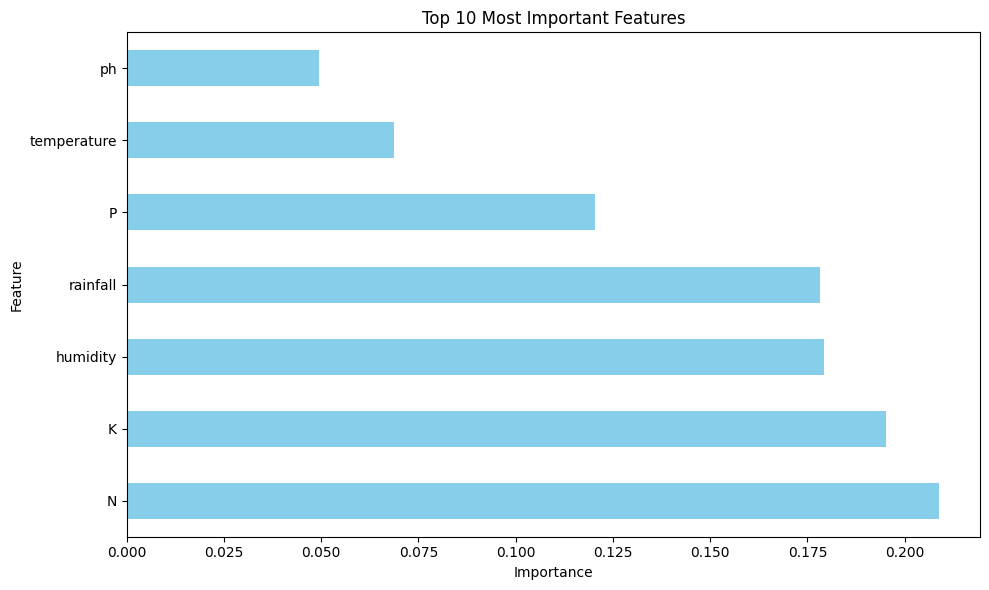

In [29]:
# 3. Feature Importance from the trained model
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Feature Engineering

# Encoding

# **Model Building**

## Split Data

In [22]:
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Train Model

In [23]:
# Build Random Forest
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [24]:
# Predictions
y_pred = rf_model.predict(X_test)

## Model Evaluation

In [25]:
acc = accuracy_score(y_test, y_pred)
print("🌲 Random Forest Accuracy:", acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

🌲 Random Forest Accuracy: 0.9200757575757575

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00       600
      banana       0.99      0.96      0.98       600
   blackgram       0.92      0.87      0.89       600
    chickpea       0.81      0.82      0.82       600
     coconut       0.93      0.93      0.93       600
      coffee       0.99      0.98      0.99       600
      cotton       0.89      0.73      0.81       600
      grapes       0.95      0.99      0.97       600
        jute       0.99      1.00      0.99       600
 kidneybeans       0.82      0.80      0.81       600
      lentil       0.96      1.00      0.98       600
       maize       0.92      0.91      0.92       600
       mango       0.98      0.98      0.98       600
   mothbeans       0.94      0.96      0.95       600
    mungbean       0.87      0.97      0.92       600
   muskmelon       0.83      0.91      0.86       600
      orang

In [26]:
from sklearn.model_selection import cross_val_score, StratifiedKFold


# Define stratified 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate accuracy across folds
scores = cross_val_score(rf_model, X, y, cv=cv, scoring="accuracy")

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())


Cross-validation scores: [0.91878788 0.92204545 0.91909091 0.91833333 0.92090909]
Mean accuracy: 0.9198333333333334
Standard deviation: 0.0014103122761478723


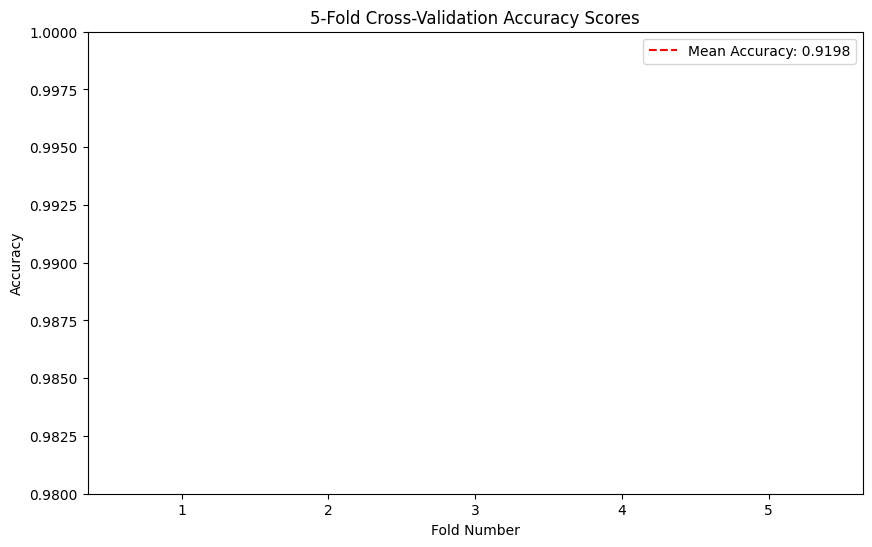

In [27]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(scores) + 1), scores, color='skyblue')
plt.axhline(scores.mean(), color='red', linestyle='--', label=f'Mean Accuracy: {scores.mean():.4f}')
plt.title('5-Fold Cross-Validation Accuracy Scores')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.ylim(0.98, 1.0)
plt.legend()
plt.show()

# Streamlit pkl

In [28]:
import pickle

# Save trained Random Forest model
with open("crop_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

print("✅ Model saved successfully!")


✅ Model saved successfully!
